<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьюера</h1>

Привет! Меня зовут Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Предлагаю сразу перейти на "ты", если это будет удобно.
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
from scipy.stats import shapiro
from scipy.stats import kstest

In [2]:
import seaborn as sns
from scipy import stats as st

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [3]:
df = pd.read_csv('/datasets/games.csv') 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


общая информация о датасете гооврит о том, что больше половины игр не получили оценки критиков, примерно две трети игр не получили пользовательских рейтингов и рейтинга  ESRB

Заменим названия столбцов (приведите к нижнему регистру):

In [5]:
df.set_axis(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 
             'jp_sales', 'other_sales', 'critical_score', 'user_score', 'rating'], axis ='columns', inplace = 'TRUE')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critical_score     8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critical_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

в столбце с пользовательскими оценками tbd, 'to be determinated'

In [9]:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

Их 2424. Так как удалять эти строчки не стоит, переведу их в NaN позже в разделе по удалению пропущенных значений

In [10]:
df['user_score'] = df['user_score'].replace('tbd', 'NaN')

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [11]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [12]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

перевел год выпуска игры в формат даты, а пользовательский рейтинг в числовой формат. Остальные переменные трогать не стал, на мой взгляд они в правильном формате. Пропуски связаны скорее всего с отсутствием данных рейтингов

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critical_score     8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Хорошо, ты все верно отметил про сырые данные. Только стоило написать выводы, где ты все просуммируешь
    
</div>

Обработайте пропуски при необходимости:


Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;


Опишите причины, которые могли привести к пропускам;


Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Поясните, как обработать это значение.

Исследуем пропуски:

Значения пропущены в столбцах: название, год выпуска, жанр, и во всех рейтингах

In [14]:
print(df.isnull().sum()) 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critical_score     8578
user_score         9125
rating             6766
dtype: int64


Строки без названия игры стоит удалить, информация бессмысленна. Строки с пропущенным годом не могу заменить ничем (исказятся результаты), стоит рассмотреть вариант удаления. Рейтинги оставлю NaN, чтобы не потерять строчки. Их слишком много, чтобы заменятьих на медиану или среднее (это приведет к сильному искажению результатов анализа)

In [15]:
df['year_of_release'].isna().sum() / df['year_of_release'].count()

0.01635656086586404

1.6% от общего датасета. Маленькая часть. Удалю строки с пропущенными годами

In [16]:
df.dropna(subset = ['name', 'year_of_release'], inplace = True)

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Да, возможное решение
    
</div>

In [17]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [18]:
df['sales_sum'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [19]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critical_score     7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
sales_sum          16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Год не преобразовался. Вообще здесь лучше сделать int

Также надо сделать проверку на дубликаты    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
Исправление замечания   
</div>

In [21]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Да, теперь все верно
    
</div>

Исправил. Теперь столбец преобразован в int. Действительно так как здесь только года, то правильнее с ними работать как с целыми числами

In [22]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critical_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critical_score     7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
sales_sum          16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


# Шаг 4. Проведите исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [24]:
p = df['year_of_release'].value_counts().sort_values(ascending = True)
k = p.to_frame()
k

,year_of_release
1980,9
1985,14
1984,14
1988,15
1990,16
1987,16
1989,17
1983,17
1986,21
1982,36


In [25]:
df['year_of_release'].value_counts().sum()

16444

In [26]:
df[df['year_of_release'] < 1990]['year_of_release'].value_counts().sum()

205

In [27]:
205/16444

0.012466553150085137

Видно, что продажи до 1990 года составляют чуть более 1% от всех продаж, так что их можно не принимать в расчет

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Все верно, но не хватает графика
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
Исправление замечания   
</div>

Text(0.5, 0, 'год выпуска')

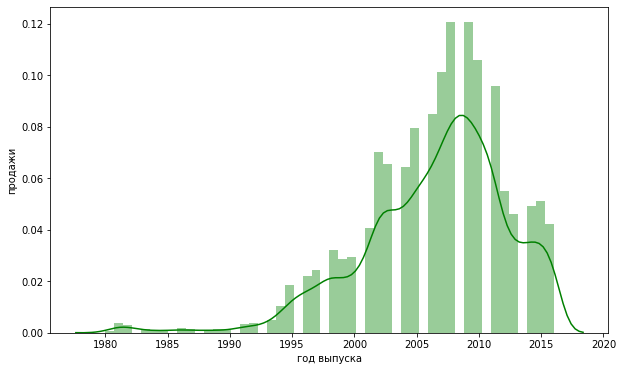

In [32]:
plt.figure(figsize=(10,6))
sns.distplot(df['year_of_release'], color = 'green')
plt.ylabel('продажи')
plt.xlabel('год выпуска')

График подтвердил выводы, сделанне на основании данных: продажи до 1990 года составляют незначительную часть и их можно не принимать в расчет

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Отлично
    
</div>

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?

1. Выберем платформы с наибольшими суммарными продажами

In [34]:
df2 = df[df['year_of_release'] > 1990]

In [35]:
df2.groupby('platform')['sales_sum'].sum().sort_values(ascending = False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.69
XB       251.57
N64      218.01
GC       196.73
GB       183.14
SNES     173.89
XOne     159.32
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       25.75
DC        15.95
NES       11.81
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sales_sum, dtype: float64

In [53]:
dft = df2.groupby('platform')['sales_sum'].sum().sort_values(ascending = False).to_frame()
dft

,sales_sum
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Построим распределения для топ5 платформ

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Здесь надо тоже построить график, и по нему посмотри, сколько платформ надо рассматривать в топе
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
Исправление замечания   
</div>

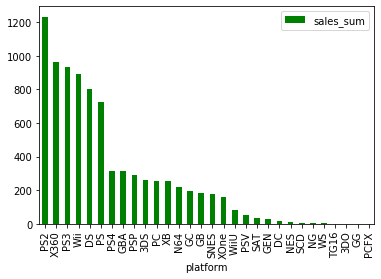

In [69]:
dft.plot(kind='bar', color = 'g')

согласно графику топ5 платформ: PS2, X360, PS3, WII, DS. И PS бликзо

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Хорошо, хотя на графике видно, что надо брать 6 платформ
</div>

In [70]:
df_ps2 = df2[df2['platform'] == 'PS2'].groupby('year_of_release')['sales_sum'].sum()

In [71]:
df_X360 = df2[df2['platform'] == 'X360'].groupby('year_of_release')['sales_sum'].sum()

In [72]:
df_PS3 = df2[df2['platform'] == 'PS3'].groupby('year_of_release')['sales_sum'].sum()

In [73]:
df_Wii = df2[df2['platform'] == 'Wii'].groupby('year_of_release')['sales_sum'].sum()

In [74]:
df_DS = df2[df2['platform'] == 'DS'].groupby('year_of_release')['sales_sum'].sum()

In [75]:
df_PS = df2[df2['platform'] == 'PS'].groupby('year_of_release')['sales_sum'].sum()

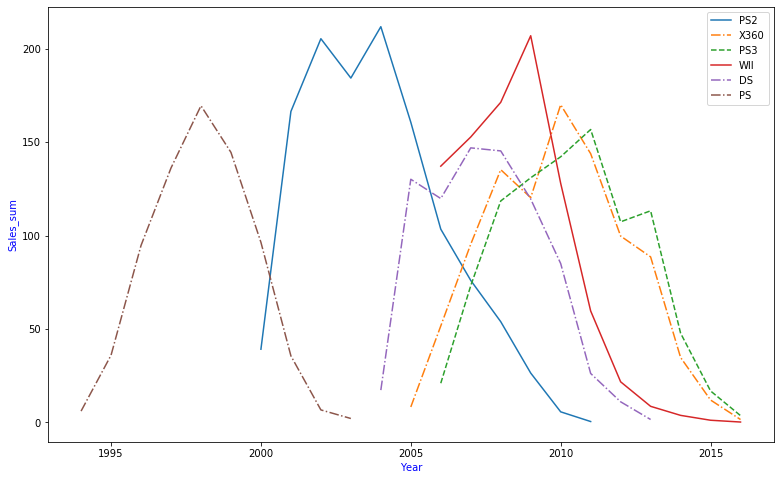

In [76]:
plt.figure(figsize = (13,8))
plt.plot(df_ps2, '-', label = 'PS2')
plt.plot(df_X360, '-.', label = 'X360')
plt.plot(df_PS3, '--', label = 'PS3')
plt.plot(df_Wii, '-', label = 'WII')
plt.plot(df_DS, '-.', label = 'DS')
plt.plot(df_PS, '-.', label = 'PS')
plt.xlabel('Year', fontsize=10, color='blue')
plt.ylabel('Sales_sum', fontsize=10, color='blue')
plt.legend()
plt.show()

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Отличный график
    
</div>

2. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле:

    PS2, PS3, WII, DS, X360 - у всех них уже к 2016 году продажи скатились к нулю 
    Самым популярной платформой в прошлом был PS, но ее жизнь закончилась в 2003

3. За какой характерный период появляются новые и исчезают старые платформы?

В среднем, согласно визуальной оценке графика, жизненный циул платформы составляет не более 10 лет (в среднем 8)

Определите, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.

чтобы исключить значимые искажения, необходимо взять период в 10 лет


In [77]:
df3 = df[df['year_of_release'] > 2006]

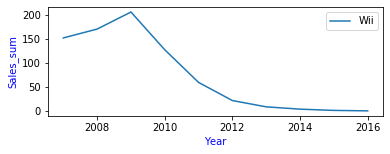

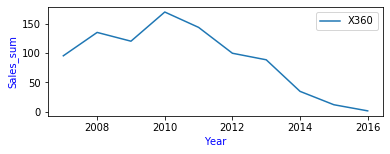

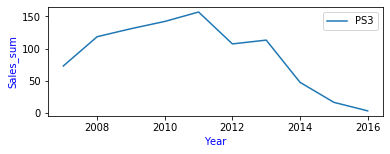

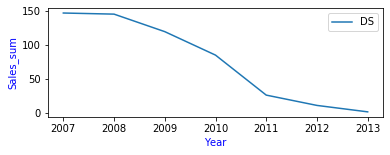

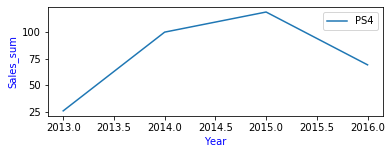

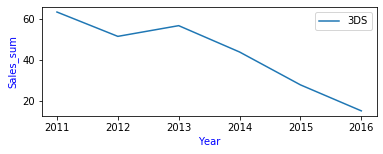

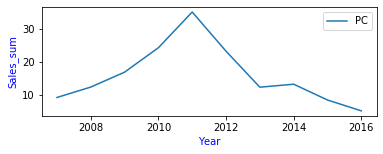

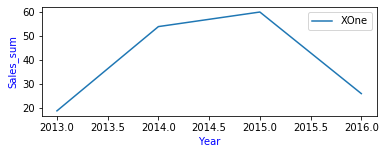

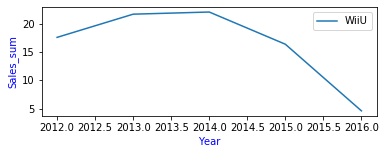

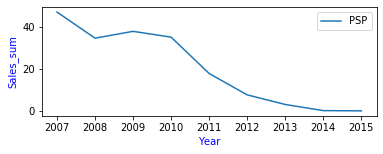

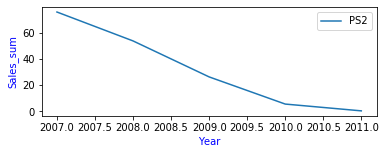

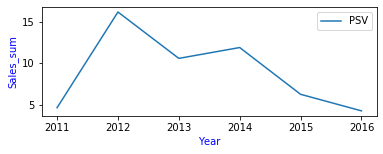

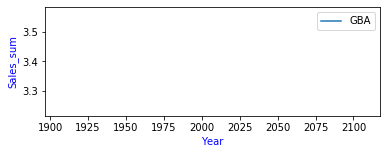

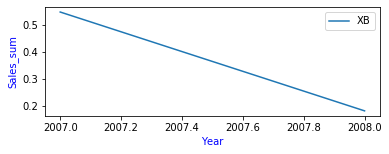

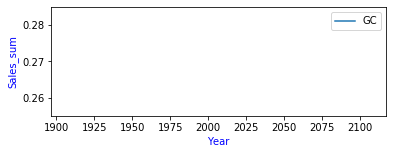

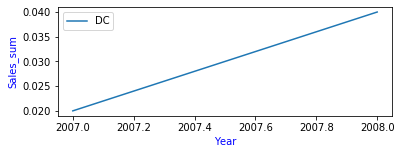

In [78]:
for col in df3['platform'].unique():
    plt.figure(figsize=(6,2))
    plt.plot(df3[df3['platform'] == col].groupby('year_of_release')['sales_sum'].sum(), label = col)
    plt.xlabel('Year', fontsize=10, color='blue')
    plt.ylabel('Sales_sum', fontsize=10, color='blue')
    plt.legend(loc = 'best')
    

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

    
Отличное использование цикла при построении графика
    
</div>

Все платформы падают!
Из потенциальной платформы можно выделить только PS4, да еще Xone


Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


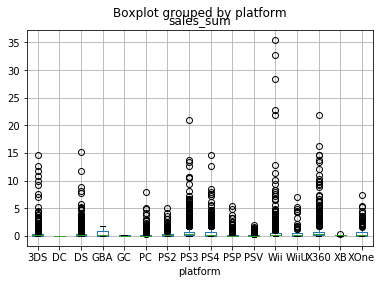

In [40]:
df3.boxplot(column = 'sales_sum', by = 'platform')


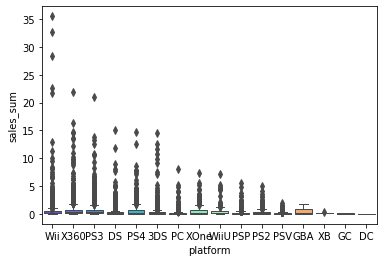

In [41]:
fig = sns.boxplot(x="platform", y="sales_sum", data=df3, palette='rainbow',linewidth=1)

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Ящики с усами вообще не наглядные. Не нужно делсть отдельный ящик для каждой платформы, нужно отображать на одной диаграмме, просто нжно настроить параметры, "приблизить" график или отобразить без выбросов showfliers=False
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
Исправление замечания   
</div>

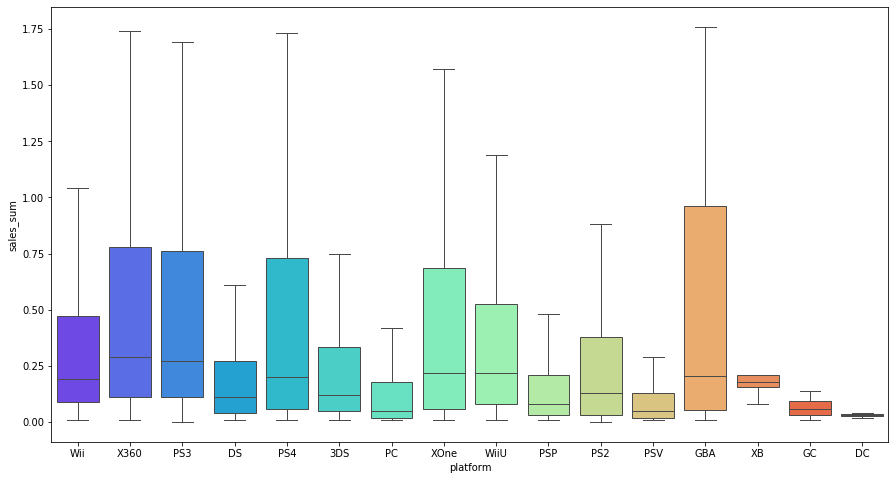

In [106]:
plt.figure(figsize=(15,8))
sns.boxplot(x="platform", y="sales_sum", data=df3, palette='rainbow', linewidth=1, showfliers=False)

Боксплот построен без учета выбросов
Выделяется 4 платформы, у которых продажи близки друк другу (X360, PS3, Xone, PS4)
Они продаются больше 
У этих платформ размах практически идентичен, и медианное значение тоже.
Важным оказывается то, что в среднем (т.е. большая часть игр) продаются плохо. ИХ суммарные продажи низки и на одинаковом уровне менее 1 млн долларов). 
Как мы увидели из некрасивых графиков (ранее) для топовых платформ все их преимущество достигается отдельными играми, продажи которых на порядок превышают общий обьем
Интересным выглядит GBA. Он похож на лидеров. Но если мы посмотрим некрасивые графики, здесь нет выбросов. То есть нет игр, которые бы "сделали кассу"


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Вот теперь отлично все видно
    
</div>

для интереса посмотим лидеров жанров

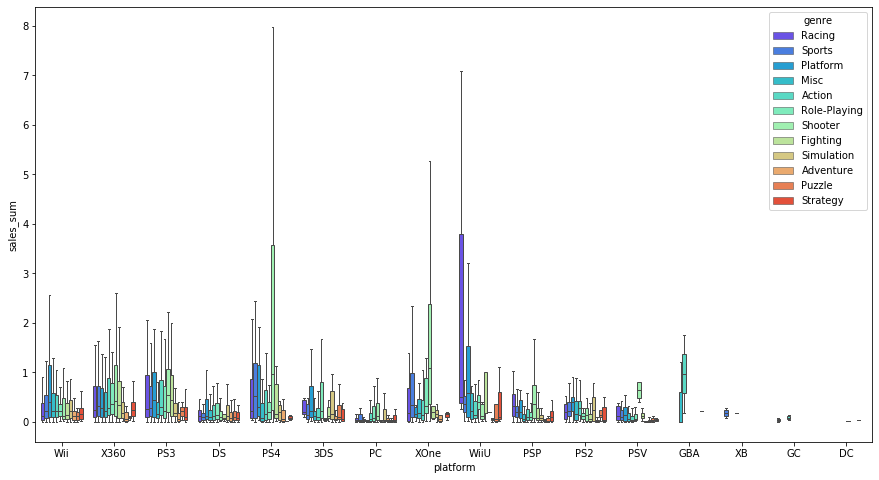

In [93]:
plt.figure(figsize=(15,8))
sns.boxplot(x="platform", y="sales_sum", data=df3, palette='rainbow', hue = 'genre', linewidth=1, showfliers=False)

Ну и для сохранения истории

Далее отдельно по каждой платформе оставлю график, хоят после построения общего боксплота он уже не выглядит интересным.

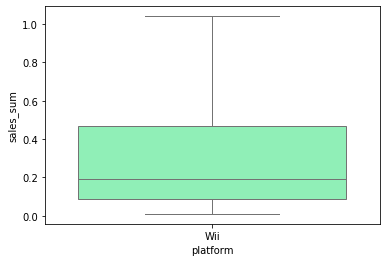

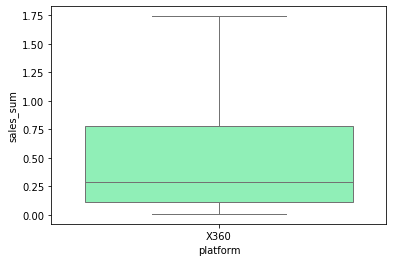

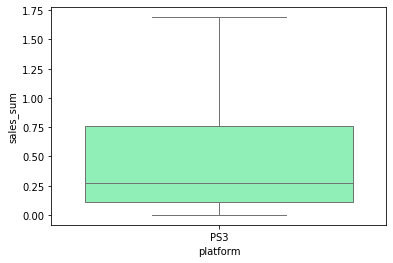

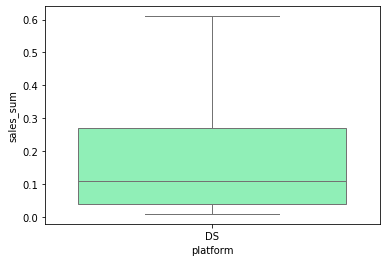

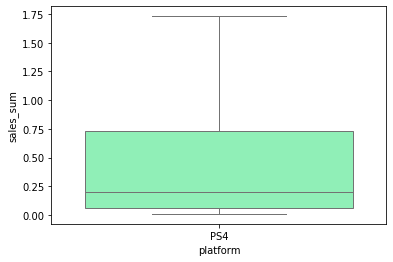

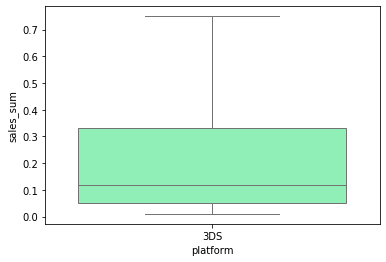

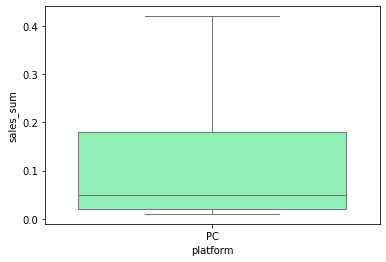

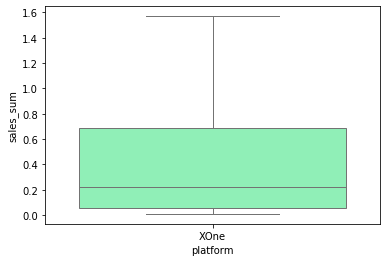

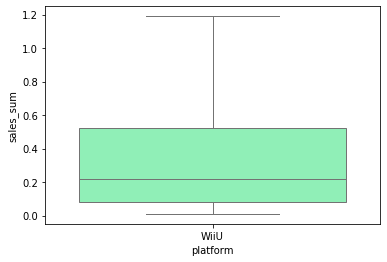

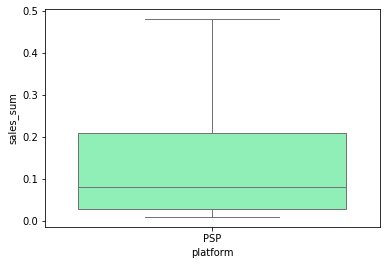

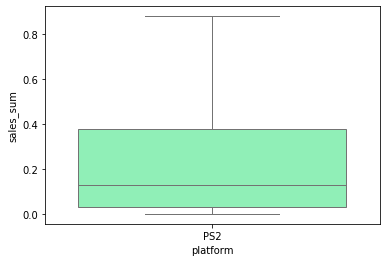

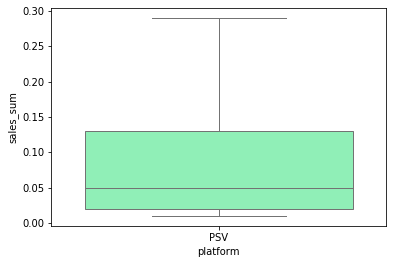

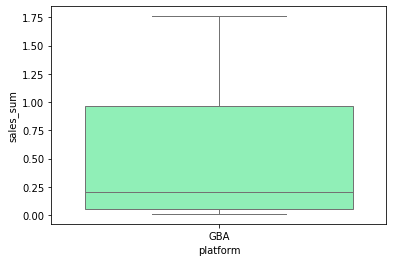

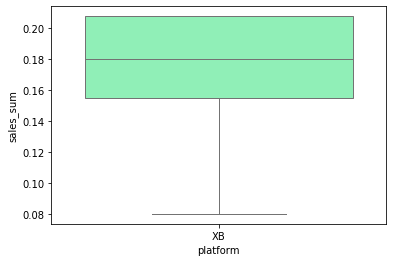

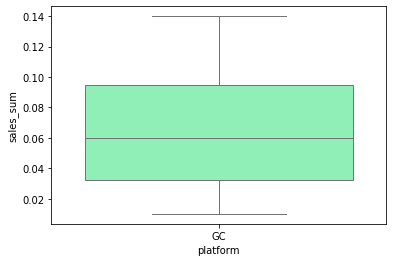

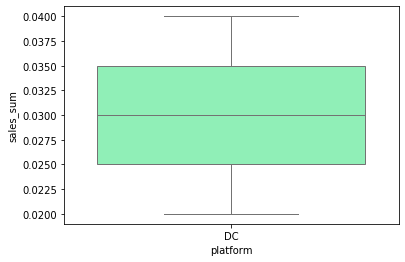

In [81]:
for col in df3['platform'].unique():
    sns.boxplot(x="platform", y="sales_sum", data=df3[df3['platform'] == col], palette='rainbow',linewidth=1, showfliers=False)
    plt.show()

старый вывод: разница в продажах от платформы к платформе очень сильно различается. Более 75% игр дают очень маленький вклад в суммарные продажи. Зато отдельные игры серьезное увеливают суммарные продажи 

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы и соотнесите их с продажами игр на других платформах.

Изучим Xone

In [107]:
df4 = df3[df3['platform'] == 'XOne']

In [108]:
df4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critical_score,user_score,sales_sum
year_of_release,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.063712,0.079481,-0.239183
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.388636,-0.069318,0.970433
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.379162,-0.055911,0.898045
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.202954,0.069591,0.452701
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.411825,-0.069645,0.995238
critical_score,0.063712,0.388636,0.379162,0.202954,0.411825,1.000000,0.472462,0.416998
user_score,0.079481,-0.069318,-0.055911,0.069591,-0.069645,0.472462,1.000000,-0.068925
sales_sum,-0.239183,0.970433,0.898045,0.452701,0.995238,0.416998,-0.068925,1.000000


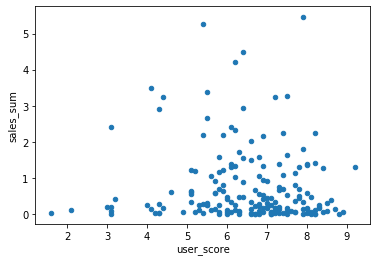

In [109]:
df4.plot(x='user_score', y='sales_sum', kind = 'scatter')

Зависимость общих продаж от пользовательского рейтинга - 0.07 - практически ноль. На графике это видно. Назвать зависимость сильной язык не поворачивается

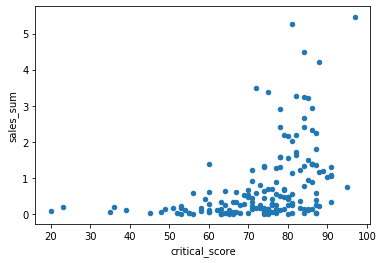

In [110]:
df4.plot(x='critical_score', y='sales_sum', kind = 'scatter')

А вот оценки критиков сильно влияют на продажи. И это видно на графике. С ростом оценок продажи резко растут вверх

Посчитаем корреляцию между общими продажами и оценкой критиков дял всех платформ

In [111]:
for col in df3['platform'].unique():
    print(col)
    df5 = df3[df3['platform'] == col]
    print(df5['critical_score'].corr(df5['sales_sum']))
    

Wii
0.23773525287897784
X360
0.3969104361038371
PS3
0.43346020599308455
DS
0.2779261869908639
PS4
0.40656790206178095
3DS
0.3487397305984834
PC
0.2995163474666781
XOne
0.4169983280084017
WiiU
0.34837976012017485
PSP
0.32101502724644476
PS2
0.37786643788499763
PSV
0.13176292727608935
GBA
nan
XB
-0.2826239050596489
GC
-0.6264814271080725
DC
nan


/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Вне зависимости от платформы (за исклчюением XB, GC и DC, которые ввиду маленькой выборки можн оне брать в расчет) кореляция между оценками критиков и продажами присутствует и она положительная (на уровне 0.4)
Производителю игр необходимо уделять внимание данному вопросу очень серьезно

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Отличный анализ корреляции. Все четко и наглядно
    
</div>

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [116]:
df3.groupby('genre')['sales_sum'].sum().sort_values(ascending = False)

genre
Action          1050.59
Shooter          678.80
Sports           658.07
Misc             487.89
Role-Playing     465.03
Racing           265.19
Platform         230.45
Simulation       199.13
Fighting         166.00
Adventure        129.99
Puzzle            79.18
Strategy          68.99
Name: sales_sum, dtype: float64

In [118]:
dft2 = df3.groupby('genre')['sales_sum'].sum().sort_values(ascending = False).to_frame()

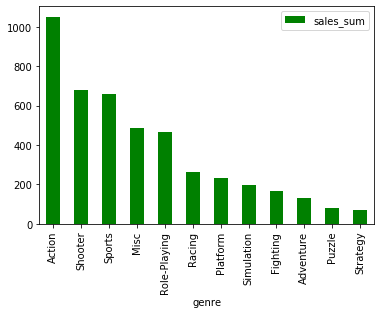

In [119]:
dft2.plot(kind='bar', color = 'g')

Самые прибыльные жанры, это action и шутер. Далее идут спортивные, RPG и Misc. Удивило, что стратегии занимают такое низкое место

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Ок, здесь тоже полезно график построить
    
</div>

# Шаг 5. Составьте портрет пользователя каждого региона

In [ ]:
Определите для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [130]:
dfs1 = df3.groupby('platform')['na_sales'].sum().sort_values(ascending = False) / df3.groupby('platform')['na_sales'].sum().sum()
dfs1 = dfs1.to_frame()
dfs1

,na_sales
platform,
X360,0.260612
Wii,0.195812
PS3,0.179469
DS,0.128960
PS4,0.051183
XOne,0.043831
3DS,0.038903
PS2,0.030576
PSP,0.024711


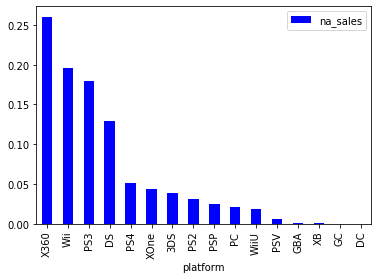

In [161]:
dfs1.plot(kind='bar', color = 'b')

In [134]:
dfs2 = df3.groupby('genre')['na_sales'].sum().sort_values(ascending = False) / df3.groupby('genre')['na_sales'].sum().sum()
dfs2 = dfs2.to_frame()
dfs2

,na_sales
genre,
Action,0.231660
Shooter,0.164793
Sports,0.152438
Misc,0.121984
Role-Playing,0.082564
Racing,0.053037
Platform,0.052313
Simulation,0.045746
Fighting,0.038535


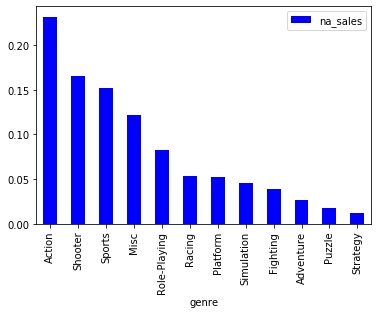

In [135]:
dfs2.plot(kind='bar', color = 'b')

In [66]:
df3['rating'].corr(df3['na_sales'], method = 'spearman')

-0.02321932494873368

Топ 5 самых популярных платформ (X360, WII, PS3, DS, PS4)  в Северной Америке имеют 80% рынка продаж.     
Топ 5 самых популярных жанров (Action, shooter, sports, misc, rpg).    
Влияние рейтинга ESRB на продажи в NA посчитаны через коэффициент ранговой корреляции Спирмена, так как рейтинг представлен в виде фактора. РЕзультат -0.02 говорит о том, что зависимости нет

Теперь рассмотрим Европу

In [137]:
dfs3 = df3.groupby('platform')['eu_sales'].sum().sort_values(ascending = False) / df3.groupby('platform')['eu_sales'].sum().sum()
dfs3 = dfs3.to_frame()
dfs3

,eu_sales
platform,
PS3,0.233775
X360,0.187887
Wii,0.156932
PS4,0.103128
DS,0.087654
PC,0.071909
3DS,0.044784
XOne,0.037709
PSP,0.029449


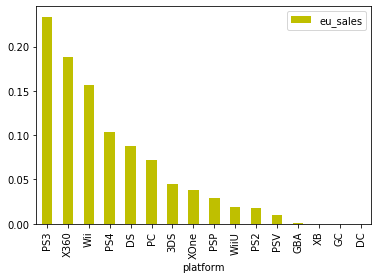

In [138]:
dfs3.plot(kind='bar', color = 'y')

In [140]:
dfs4 = df3.groupby('genre')['eu_sales'].sum().sort_values(ascending = False) / df3.groupby('genre')['eu_sales'].sum().sum()
dfs4 = dfs4.to_frame()
dfs4


,eu_sales
genre,
Action,0.245353
Shooter,0.168232
Sports,0.154586
Misc,0.093282
Racing,0.076478
Role-Playing,0.075045
Platform,0.051034
Simulation,0.046502
Fighting,0.027885


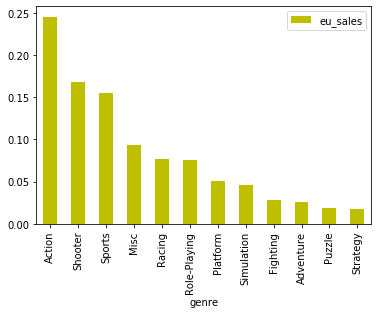

In [141]:
dfs4.plot(kind='bar', color = 'y')

In [70]:
df3['rating'].corr(df3['eu_sales'], method = 'spearman')

0.15562994887849865

Топ 5 самых попялярных платформ (X360, WII, PS3, DS, PS4)  в Европе имеют 70% рынка продаж. Если платформы те же в топ5, то вот их рейтинг распределился по-другому.     
Топ 5 самых популярных жанров (Action, shooter, sports, misc, rpg/racing) (Европа от Америки не сильно отличается)
Влияние рейтинга ESRB на продажи в NA посчитаны через коэффициент ранговой корреляции Спирмена, так как рейтинг представлен в виде фактора. РЕзультат 0.15 уже другой. И он говорит о том, что в Европе данный рейтинг имеет вес. 

Теперь рассмотрим Японию

.

In [143]:
dfs5 = df3.groupby('platform')['jp_sales'].sum().sort_values(ascending = False) / df3.groupby('platform')['jp_sales'].sum().sum()
dfs5 = dfs5.to_frame()
dfs5

,jp_sales
platform,
DS,0.211108
3DS,0.206370
PS3,0.160654
PSP,0.135857
Wii,0.121275
PSV,0.044794
PS2,0.037513
PS4,0.032734
WiiU,0.026683


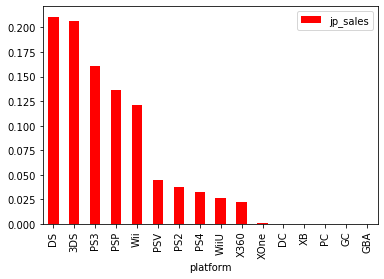

In [144]:
dfs5.plot(kind='bar', color = 'r')

In [146]:
dfs6 = df3.groupby('genre')['jp_sales'].sum().sort_values(ascending = False) / df3.groupby('genre')['jp_sales'].sum().sum()
dfs6 = dfs6.to_frame()
dfs6

,jp_sales
genre,
Role-Playing,0.308776
Action,0.197490
Misc,0.100068
Sports,0.082614
Adventure,0.055192
Platform,0.053305
Fighting,0.052895
Simulation,0.042927
Shooter,0.035810


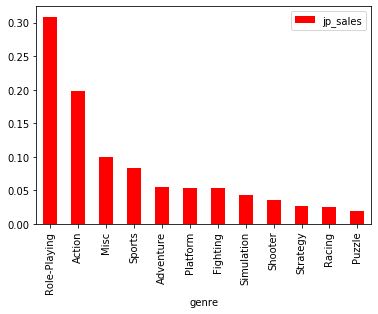

In [147]:
dfs6.plot(kind='bar', color = 'r')

In [74]:
df3['rating'].corr(df3['jp_sales'], method = 'spearman')

0.23001764702457056

В Японии любят играть на других платформах (в отличие от Америки и Европы). Здесь в почете DS, 3DS. Топ5 опять занимает бльшую часть рынка, - 75%
И жанры другие. К примеру RPG является фаворитом (~31%), хотя в Европе и Америке еле попадал в пятерку.      
Влияние рейтинга ESRB на продажи в Японии посчитаны через коэффициент ранговой корреляции Спирмена, так как рейтинг представлен в виде фактора. РЕзультат 0.23 - самый высокий из 3 регионов. В Японии смотрят на рейтинги больше всего при выборе игр, тем самым это влияет на продажи

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Все верно. Портреты пользователей получены правильно. Но также можно добавить диаграмм для наглядности. Любая диаграмма намного более считываемы и нагляднее, чем таблица
    
</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Ок, классно добавлены диаграммы
    
</div>

# Шаг 6. Проведите исследование статистических показателей

Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения

Рассчитаем средние значения рейтингов и расположим их по убыванию от самых высоких оценок критиков

In [148]:
df6 = df3.groupby('genre')[['user_score', 'critical_score']].mean().sort_values(by = 'critical_score', ascending = False) 

In [149]:
df6.set_axis(['user_score_mean', 'critical_score_mean'], axis ='columns', inplace = 'TRUE')

In [150]:
df6

,user_score_mean,critical_score_mean
genre,,
Role-Playing,7.387333,71.984163
Strategy,6.799408,71.762500
Shooter,6.705421,70.834630
Sports,6.307980,69.763206
Platform,6.959459,69.760638
Fighting,7.026977,69.562500
Racing,6.563322,68.477193
Puzzle,7.117722,67.692308
Misc,6.649673,67.138037


Рассчитаем средние значения дисперсии и расположим их по убыванию от самых высоких оценок критиков

.

In [151]:
df7 = df3.groupby('genre')[['user_score', 'critical_score']].var().sort_values(by = 'critical_score', ascending = False) 

In [152]:
df7.set_axis(['user_score_var', 'critical_score_var'], axis ='columns', inplace = 'TRUE')

In [153]:
df7

,user_score_var,critical_score_var
genre,,
Shooter,2.283735,223.401449
Sports,2.814035,216.268644
Platform,2.577641,208.814057
Misc,2.459820,204.667041
Racing,2.538372,203.609513
Adventure,2.637565,197.958340
Action,1.830189,197.539041
Fighting,1.821418,197.261775
Role-Playing,1.208414,150.918116


Рассчитаем стандартные отклонения и расположим их по убыванию от самых высоких оценок критиков

In [154]:
df8 = df3.groupby('genre')[['user_score', 'critical_score']].std().sort_values(by = 'critical_score', ascending = False) 

In [155]:
df8.set_axis(['user_score_std', 'critical_score_std'], axis ='columns', inplace = 'TRUE')

In [156]:
df8

,user_score_std,critical_score_std
genre,,
Shooter,1.511203,14.946620
Sports,1.677509,14.706075
Platform,1.605503,14.450400
Misc,1.568381,14.306189
Racing,1.593227,14.269181
Adventure,1.624058,14.069767
Action,1.352845,14.054858
Fighting,1.349599,14.044991
Role-Playing,1.099279,12.284873


In [157]:
df9 = df6.join(df7).join(df8)

In [158]:
df9

,user_score_mean,critical_score_mean,user_score_var,critical_score_var,user_score_std,critical_score_std
genre,,,,,,
Role-Playing,7.387333,71.984163,1.208414,150.918116,1.099279,12.284873
Strategy,6.799408,71.762500,3.015297,142.635063,1.736461,11.942992
Shooter,6.705421,70.834630,2.283735,223.401449,1.511203,14.946620
Sports,6.307980,69.763206,2.814035,216.268644,1.677509,14.706075
Platform,6.959459,69.760638,2.577641,208.814057,1.605503,14.450400
Fighting,7.026977,69.562500,1.821418,197.261775,1.349599,14.044991
Racing,6.563322,68.477193,2.538372,203.609513,1.593227,14.269181
Puzzle,7.117722,67.692308,2.226861,137.687537,1.492267,11.734033
Misc,6.649673,67.138037,2.459820,204.667041,1.568381,14.306189


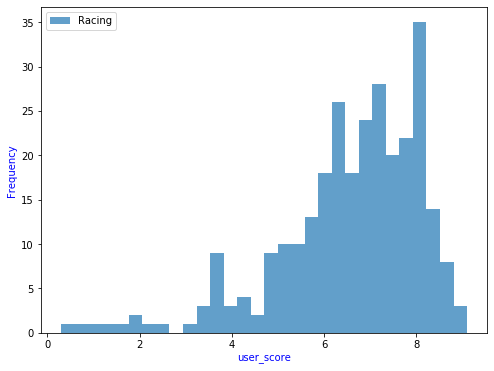

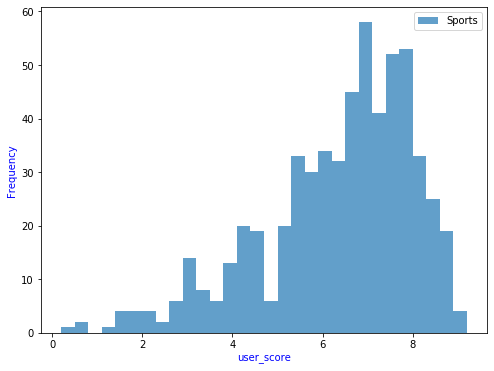

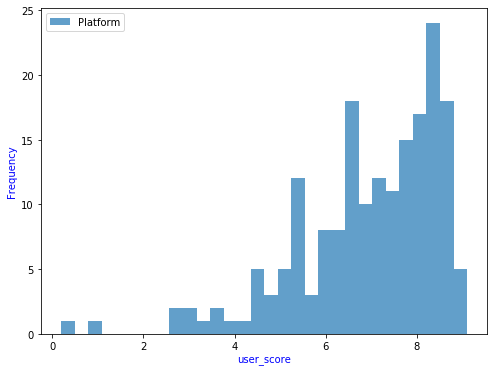

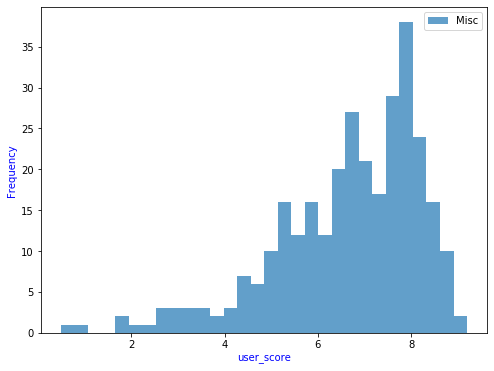

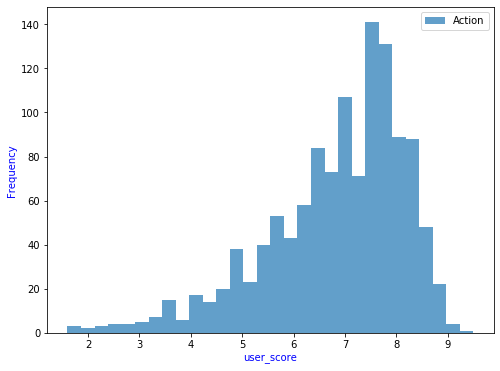

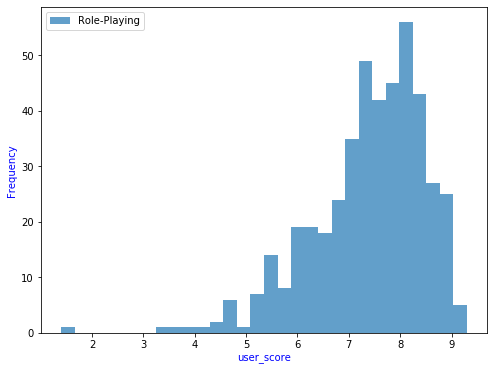

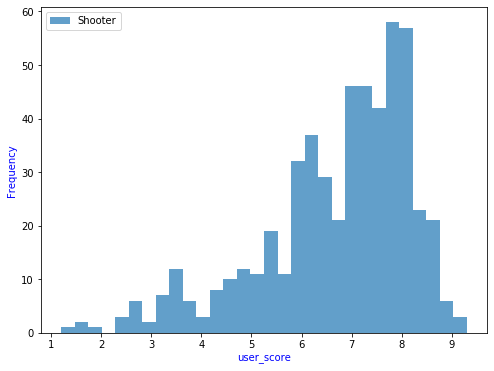

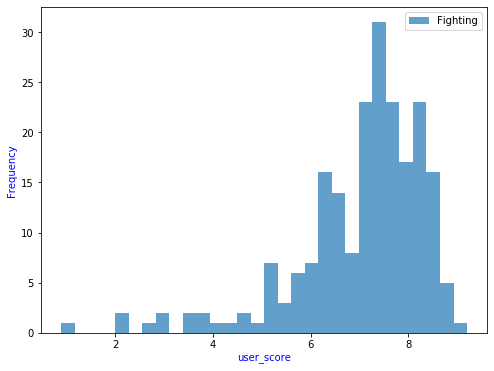

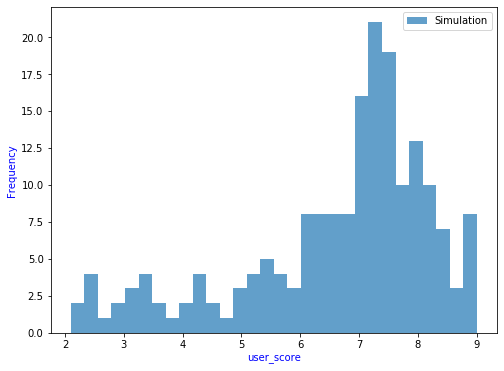

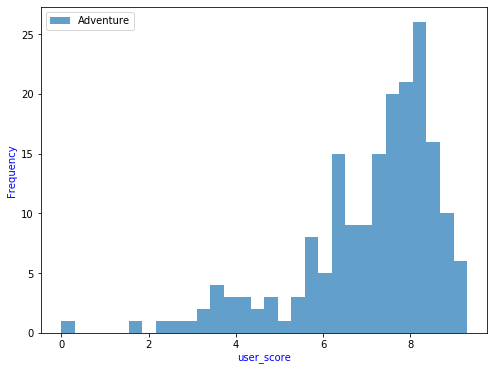

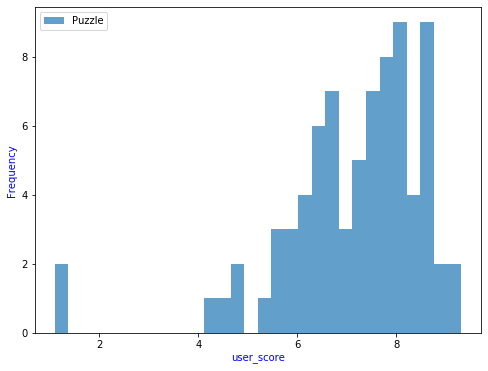

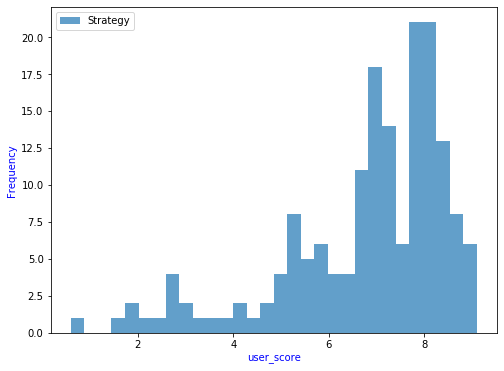

In [159]:
for col in df3['genre'].unique():
    plt.figure(figsize=(8,6))
    plt.hist(df3[df3['genre'] == col]['user_score'], alpha = 0.7, label = col, bins = 30)
    plt.xlabel('user_score', fontsize=10, color='blue')
    plt.ylabel('Frequency', fontsize=10, color='blue')
    plt.legend(loc = 'best') 

Распределения пользовательских оценок действительно расположились вокруг оценки 7 +/- 1.5.
Сами распределения в основном скошены влево. Это говорит о том, что людям проще поставит ьсреднюю оценку  и плохую, чем решитсья поставить очень хорошую оценку

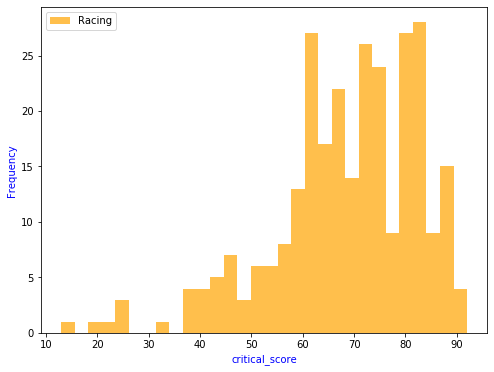

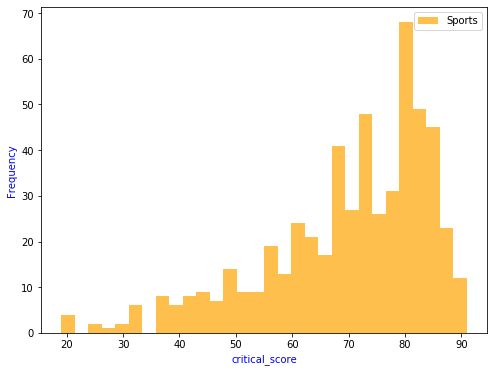

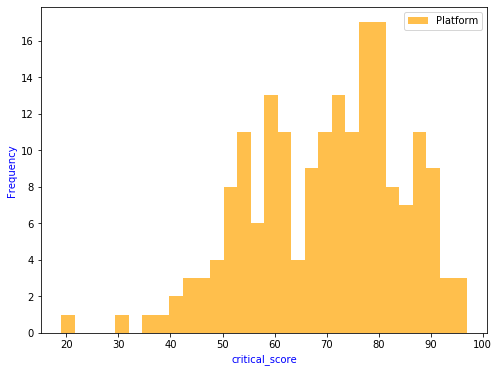

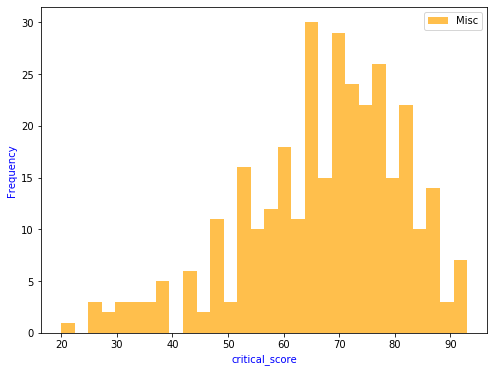

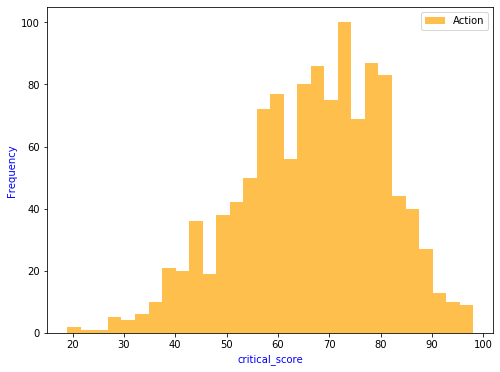

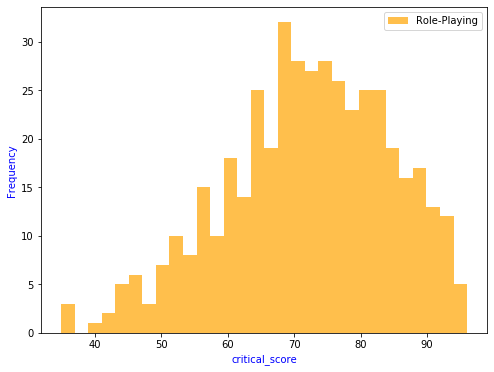

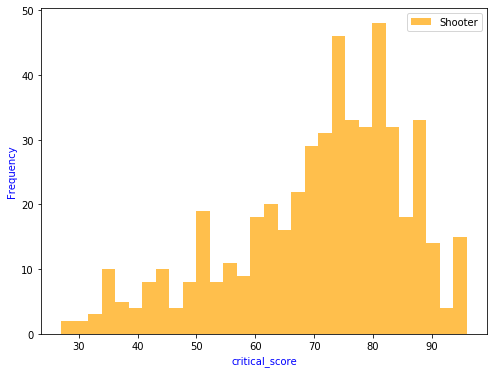

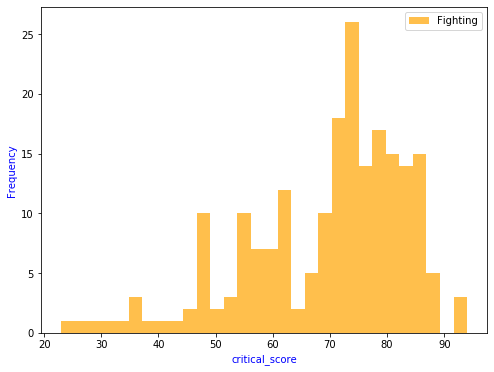

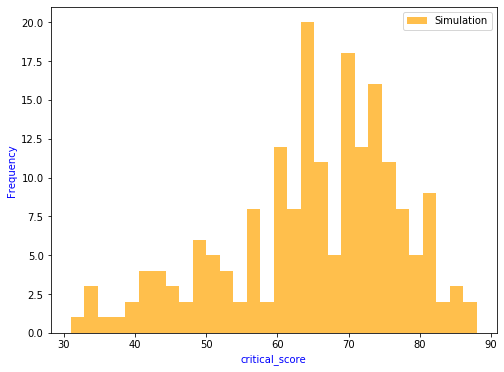

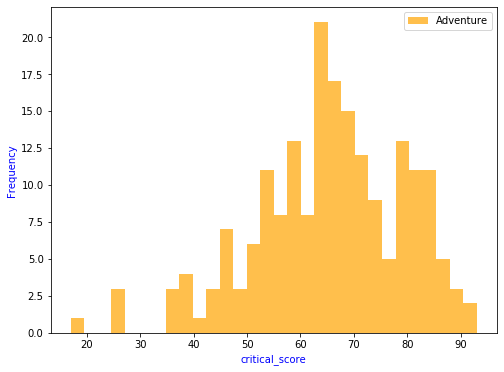

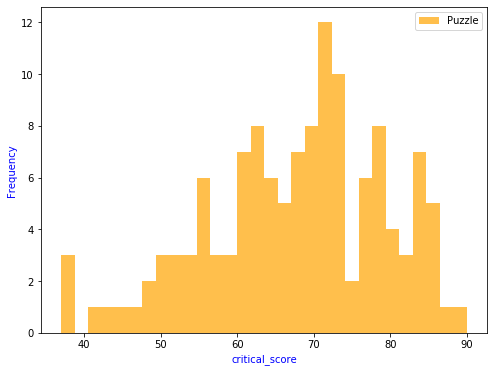

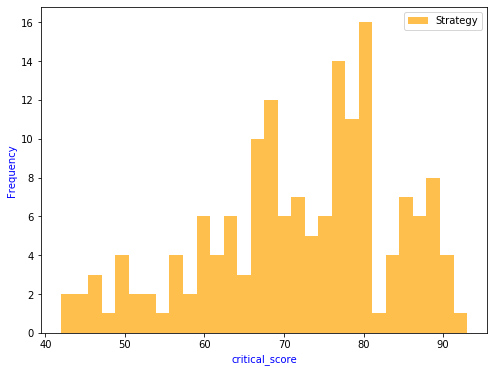

In [160]:
for col in df3['genre'].unique():
    plt.figure(figsize=(8,6))
    plt.hist(df3[df3['genre'] == col]['critical_score'], color = 'orange', alpha = 0.7, label = col, bins = 30)
    plt.xlabel('critical_score', fontsize=10, color='blue')
    plt.ylabel('Frequency', fontsize=10, color='blue')
    plt.legend(loc = 'best') 

Распределения оценок критиков действительно расположились вокруг оценки 70 +/- 10. Отличается все лишь тем, что у пользователей 10 бальная шкала, а у критиков 100 бальная

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Классный наглядный анализ статитстики. Здорово использован цикл для построения гистограммы
    
</div>

# Шаг 7. Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Проверим "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?". Сравним их при помощт t-теста сравнения двух выборок

In [173]:
results = st.ttest_ind(df3[df3['platform'] == 'XOne']['user_score'], df3[df3['platform'] == 'PC']['user_score'], equal_var = False, nan_policy="omit")

print('p-значение:', results.pvalue)

p-значение: 0.044018928589263005


Пороговое значение 0.05
ТАк как наша t-статистика менее 0.05, мы должны отвергнуть гипотезу о равенстве средних. Следовательно можно сделать вывод о том, что пользовательские рейтинги Xbox One и PC НЕ одинаковые 

Проверим "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные". Сравним их при помощт t-теста сравнения двух выборок

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Не верная формулировка гипотез и соответственно вывод не правильный. Посмотри как правильно сформулировать нулевую и альтернативную гипотезу
    
</div> 

<div style="border:solid blue 2px; padding: 20px"> 
    
Исправление замечания   
</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Да, теперь все верно
    
</div>

### Первая проверка: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза:Средние пользовательские рейтинги платформ Xbox One и PC статистически не отличаются.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различны.

Проверим гипотезу с помощью разных тестов (код выше оставил для истории)

Проверим распределения на нормальность
Графически и тестами

In [238]:
dftest1 = df3[df3['platform'] == 'XOne']['user_score'].dropna()
dftest1

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [239]:
df3[df3['platform'] == 'XOne']['user_score'].mean()

6.521428571428572

Статистика Шапиро-Вилка=0.955, p=0.000
ШВ: не выглядит нормальным (отвергаем H0)
Статистика Колмогорова-Смирнова=0.988, p=0.000
КС: не выглядит нормальным (отвергаем H0)


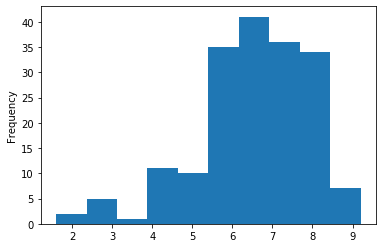

In [224]:
dftest1.plot(kind='hist')
stat, p = shapiro(dftest1)
print('Статистика Шапиро-Вилка=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('ШВ: выглядит как нормальное (не отвергаем H0)')
else:
    print('ШВ: не выглядит нормальным (отвергаем H0)')
stat1, p1 = kstest(dftest1, 'norm')
print('Статистика Колмогорова-Смирнова=%.3f, p=%.3f' % (stat1, p1))
if p1 > alpha:
    print('КС: выглядит как нормальное (не отвергаем H0)')
else:
    print('КС: не выглядит нормальным (отвергаем H0)')

In [240]:
dftest2 = df3[df3['platform'] == 'PC']['user_score'].dropna()
dftest2

85       7.6
192      4.0
218      8.2
288      7.9
313      8.1
        ... 
16640    3.8
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 571, dtype: float64

In [241]:
df3[df3['platform'] == 'PC']['user_score'].mean()

6.765499124343257

Статистика Шапиро-Вилка=0.924, p=0.000
ШВ: не выглядит нормальным (отвергаем H0)
Статистика Колмогорова-Смирнова=0.985, p=0.000
КС: не выглядит нормальным (отвергаем H0)


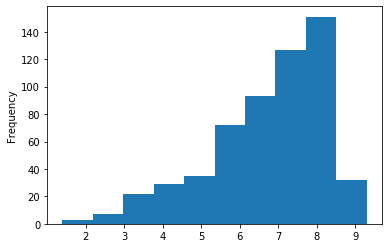

In [225]:
dftest2.plot(kind='hist')
stat, p = shapiro(dftest2)
print('Статистика Шапиро-Вилка=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('ШВ: выглядит как нормальное (не отвергаем H0)')
else:
    print('ШВ: не выглядит нормальным (отвергаем H0)')
stat1, p1 = kstest(dftest2, 'norm')
print('Статистика Колмогорова-Смирнова=%.3f, p=%.3f' % (stat1, p1))
if p1 > alpha:
    print('КС: выглядит как нормальное (не отвергаем H0)')
else:
    print('КС: не выглядит нормальным (отвергаем H0)')

Использовать ttest нельзя, так как ипотеза о нормальности распределения отвергнута.
Ради интереса сделаем тест и посмотрим что он покажет

In [202]:
results = st.ttest_ind(dftest1, dftest2, equal_var = False, nan_policy="omit")

print('p-значение:', results.pvalue)
print('значение t статистики:', results.statistic)

p-значение: 0.04401892858926169
значение t статистики: -2.0215585703121315


Игровой(не применимый) т-тест показал, что мы должны отвергнуть гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC.
Хотя на уровне значимости 0.01 мы бы уже не могли отвергнуть гипотезу...

ОДНАКО проведем Тест Манна-Уитни. преимущество его состоит в том, что мы отказываемся от предположения нормальности распределения и одинаковых дисперсий.

In [208]:
u, p_value = st.mannwhitneyu(dftest1, dftest2)
print("two-sample wilcoxon-test, p_value:", p_value)
alpha = 0.05
print('alpha=', alpha)
if p1 > alpha:
    print('two-sample wilcoxon-test: (Не отвергаем H0 о равенстве средних)')
else:
    print('two-sample wilcoxon-test: (Отвергаем H0 о равенстве средних)')

two-sample wilcoxon-test, p_value: 0.0020762145202609323
alpha= 0.05
two-sample wilcoxon-test: (Отвергаем H0 о равенстве средних)


ВЫВОД: Знечение p_value теста Манна-Утни ниже критического значение, следовательно мы должны отвергнуть гипотезу о равенстве средних

### Вторая проверка: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

Нулевая гипотеза:Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные не отличаются.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные отличаются.

In [233]:
dftest3 = df3[df3['genre'] == 'Action']['user_score'].dropna()
dftest3

16       8.2
23       8.1
42       8.3
51       7.9
57       7.5
        ... 
16620    8.2
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 1214, dtype: float64

In [234]:
df3[df3['genre'] == 'Action']['user_score'].mean()

6.836079077429983

Статистика Шапиро-Вилка=0.931, p=0.000
ШВ: не выглядит нормальным (отвергаем H0)
Статистика Колмогорова-Смирнова=0.988, p=0.000
КС: не выглядит нормальным (отвергаем H0)


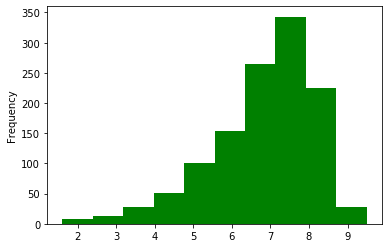

In [223]:
dftest3.plot(kind='hist', color = 'g')
stat, p = shapiro(dftest3)
print('Статистика Шапиро-Вилка=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('ШВ: выглядит как нормальное (не отвергаем H0)')
else:
    print('ШВ: не выглядит нормальным (отвергаем H0)')
stat1, p1 = kstest(dftest3, 'norm')
print('Статистика Колмогорова-Смирнова=%.3f, p=%.3f' % (stat1, p1))
if p1 > alpha:
    print('КС: выглядит как нормальное (не отвергаем H0)')
else:
    print('КС: не выглядит нормальным (отвергаем H0)')

In [235]:
dftest4 = df3[df3['genre'] == 'Sports']['user_score'].dropna()
dftest4

3        8.0
13       7.7
15       7.4
77       4.3
94       5.0
        ... 
16262    7.4
16450    4.5
16518    1.4
16528    6.9
16643    6.6
Name: user_score, Length: 589, dtype: float64

In [236]:
df3[df3['genre'] == 'Sports']['user_score'].mean()

6.307979626485569

Статистика Шапиро-Вилка=0.938, p=0.000
ШВ: не выглядит нормальным (отвергаем H0)
Статистика Колмогорова-Смирнова=0.966, p=0.000
КС: не выглядит нормальным (отвергаем H0)


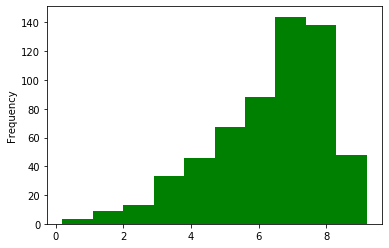

In [227]:
dftest4.plot(kind='hist', color = 'g')
stat, p = shapiro(dftest4)
print('Статистика Шапиро-Вилка=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('ШВ: выглядит как нормальное (не отвергаем H0)')
else:
    print('ШВ: не выглядит нормальным (отвергаем H0)')
stat1, p1 = kstest(dftest4, 'norm')
print('Статистика Колмогорова-Смирнова=%.3f, p=%.3f' % (stat1, p1))
if p1 > alpha:
    print('КС: выглядит как нормальное (не отвергаем H0)')
else:
    print('КС: не выглядит нормальным (отвергаем H0)')

Распределения очень похожие, но на нормальные не похожи вообще. Даже играть с t-test нет смысла

Сразу проведу тест Манна-Уитни

In [229]:
u, p_value = st.mannwhitneyu(dftest3, dftest4)
print("two-sample wilcoxon-test, p_value:", p_value)
alpha = 0.05
print('alpha=', alpha)
if p1 > alpha:
    print('two-sample wilcoxon-test: (Не отвергаем H0 о равенстве средних)')
else:
    print('two-sample wilcoxon-test: (Отвергаем H0 о равенстве средних)')

two-sample wilcoxon-test, p_value: 1.4668147774326068e-10
alpha= 0.05
two-sample wilcoxon-test: (Отвергаем H0 о равенстве средних)


ВЫВОД: несмотря на похожие на первыхй взгляд графики, мы вынуждены отвергнуть гипотезу о развенстве средних.
Средние оценки 6.8 и 6.3 оказались статистически разными. Здесь сыграли свою роль выборки без пропущенных значений (1214 и 589, т.е. довольно разные), и большая плотность оценков 8 для спорта

<div style="border:solid orange 2px; padding: 20px"> 
Далее ниже до раздела 8 записи, оставленные для истории. Их читать не нужно, так как весь раздел 7 описан выше
</div>

In [166]:
results.statistic

6.661247173505021

.

Пороговое значение 0.05 Так как наша t-статистика менее 0.05 (она очень маленькая), мы должны отвергнуть гипотезу о равенстве средних. Следовательно можно сделать вывод о том, что оценки игр Action и Sports НЕ одинаковые


Так как я не уверен, что распределения нормальные, то стоит попробовать применить критерий Манна-Уитни. реимущество его состоит в том, что мы отказываемся от предположения нормальности распределения и одинаковых дисперсий. Необходимо, чтобы данные были измерены как минимум в порядковой шкале.

In [180]:
u, p_value = st.mannwhitneyu(df3[df3['platform'] == 'XOne']['user_score'], df3[df3['platform'] == 'PC']['user_score'])
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 0.06616242659368704


Пороговое значение 0.05 Так как наша тестовая статистика более 0.05, мы не можем отвергнуть гипотезу о равенстве средних. Хотя значение статистики и близко к 0.05, все же есть основания предполагать, что пользовательские рейтинги Xbox One и PC одинаковые

In [230]:
u, p_value = st.mannwhitneyu(df3[df3['genre'] == 'Action']['user_score'], df3[df3['genre'] == 'Sports']['user_score'])
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 2.8293865312467363e-12


А здесь ничего не изменилось. Оценки для action и sports даже близко не похожи

# Шаг 8. Напишите общий вывод

Был проведен анализ, по результатам которого
Было определено, что успех игры зависит от региона, где она будет продаваться, платформы и рейтинга ESNB
Причем данные параметры где-то сильно влияют, где-то нет.

К примеру в Японии при планировании рекламной кампании нужно сделать ставку на RPG, платформу DS, включить оценки ESNB,


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Итоговый комментарий по проекту</h1>

Ты хорошо выполнил этот  сложный проект. Ты здорово освоила материал, молодец, все верно рассчитано и проанализировано.
    
У тебя получается классная наглядная визуализация, т.ч. старайся больше ее использовать.
    
Посмотри тему проверки гипотез еще раз. Она важна на практике и будет встречаться почти в каждом проекте.
    
Посмотри замечания и постарайся их поправить. Удачи.
</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Проект отлично доработан, молодец
    
</div>